<a href="https://colab.research.google.com/github/huanyang123/ML-PDB/blob/master/IXIS_banking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A complete analysis for predicting banking behavior by the classification method.**

##                        By Huanwang (Henry) Yang (2021-6-5)

---

##**Objective:**
Build a predictive model to score each potential customer’s propensity to purchase, as well as understanding which customer characteristics are most important in driving purchasing behavior, in order to inform future marketing segmentation personalization.

##**Dataset:**
The data was obtained from the UCI data resource http://archive.ics.uci.edu/ml/datasets/Bank+Marketing

##**Modeling procedures:**
The XGBoost,  CNN (CONV1D) and LogisticRegression algrithms were built to do binary classification using different datasets as below. This is to test the differences among the models. 
## **A diagram of the procedures:**
<img src="/content/drive/My Drive/ML-colab/classification/banking-img.001.jpeg"  >

<ol>
<li> Model-1: XGBoost using data for numerical features </li> 
<li> Model-2: XGBoost using data for categorical features </li> 
<li> Model-3: XGBoost using data for full features (numerical + categorical) </li> 
<li> Model-4: XGBoost using data for full features, but upper sampling the minority class by SMOTE </li> 
<li> Model-5: CNN (CONV1D) using data for full features </li> 
<li> Model-6: LogisticRegression using data for full features </li> 

</ol>




 
A summary of result:
<table style="width:100%">
  
 <tr> <th>Model:</th>   <td>AUC_ROC</td>  <td>Accuracy</td>  <td>precision</td> <td>recall</td><td>f1_score_mean</td> </tr>


<tr> <th>Model-1</th>   <td> 0.87</td>  <td>0.80</td>  <td>0.70</td><td>0.74</td><td>0.72</td> </tr>

<tr> <th>Model-2</th>   <td> 0.88</td>  <td>0.77</td>  <td>0.70</td><td>0.68</td><td>0.69</td> </tr>

<tr> <th>Model-3</th>   <td> 0.87</td>  <td>0.80</td>  <td>0.69</td><td>0.75</td><td>0.72</td> </tr>

<tr> <th>Model-4</th>   <td> 0.86</td>  <td>0.79</td>  <td>0.68</td><td>0.74</td><td>0.70</td> </tr>

<tr> <th>Model-5</th>   <td> 0.90</td>  <td>0.79</td>  <td>0.80</td><td>0.58</td><td>0.61</td> </tr>


</table>


# Conclusions: 








# <b>1.  Load libraries </b>





In [2]:
# Always do this step first. It authrize you the path below.
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [1]:
import sys  #utilized the auto-selection modules that I developed
import warnings
warnings.filterwarnings('ignore')

##the path for tune modules and data files
rpath='/content/drive/My Drive/ML-colab/'
sys.path.append(rpath+'ML-tune/')
 
import ml_tune as tune  #A module to select the best model & hyperparameter 
import ml_utility as ut  #a utility module to plot, trasnform, select features... 

In [4]:
#libraries for data manipulations
import pandas as pd
import numpy as np

# all the libraries for classification algorithms (classical ML).
from  sklearn.ensemble import RandomForestClassifier
from  sklearn.ensemble.weight_boosting import AdaBoostClassifier
from  sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from  sklearn.ensemble import ExtraTreesClassifier
from  xgboost import XGBClassifier
from  sklearn.tree.tree import DecisionTreeClassifier
from  sklearn.neighbors.classification import KNeighborsClassifier #often used
from  sklearn.neighbors.classification import RadiusNeighborsClassifier  # if data not uniformly sampled
from  sklearn.linear_model import LogisticRegression
from  sklearn.linear_model import Perceptron
from  sklearn.linear_model import SGDClassifier
from  sklearn.svm.classes import LinearSVC
from  sklearn.svm.classes import SVC
from  sklearn.naive_bayes import GaussianNB
from  sklearn.naive_bayes import BernoulliNB  #for binary/boolean features
from  sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from  sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from  sklearn.gaussian_process import GaussianProcessClassifier
from  sklearn.neural_network import MLPClassifier

from  sklearn.model_selection import train_test_split
from  sklearn.model_selection import cross_val_score

#libraries for GLM 
import statsmodels.api as sm
from scipy import stats
from scipy.stats import norm

#libraries for deep learning:  CNN (CONV1D)
import tensorflow as tf
from keras.datasets import cifar10  #load data
from tensorflow.python.keras.layers import Dense, Flatten, BatchNormalization
from tensorflow.python.keras.layers import Conv1D, MaxPooling1D,Dropout
from tensorflow.python.keras import Sequential
from tensorflow.keras.optimizers import Adam

#libraries for ploting
import seaborn as sns
import matplotlib.pyplot as plt 
sns.set(style="whitegrid", color_codes=True)
plt.rc("font", size=16)
# allow plots to appear in the notebook
%matplotlib inline 

In [5]:
#display the maximum rows & columns for DataFrame with given format
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 200)
pd.set_option('display.float_format', '{:.2f}'.format)
#pd.reset_option('all') #reset all to restore the default

# <b>2. Load the dataset and understand the business </b>

In [6]:
#load data and display some information
df=pd.read_csv(rpath+'classification/banking-IXIS/bank-additional-full.csv', 
               encoding = "ISO-8859-1", sep=';')
df.shape

(41188, 21)

The dataset is about the direct marketing campaigns (phone calls) of a Portuguese banking institution. It has 41188 instances and 21 attributes.

Below is the feature Information:


<b> Client information:</b><br>
1 - age (numeric)   
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')  
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)   
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')  
5 - default: has credit in default? (categorical: 'no','yes','unknown')  
6 - housing: has housing loan? (categorical: 'no','yes','unknown')  
7 - loan: has personal loan? (categorical: 'no','yes','unknown')  

<b> related with the last contact of the current campaign:</b><br>
8 - contact: contact communication type (categorical: 'cellular','telephone')  
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')  
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')  
11 - duration: <i>last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. </i>
  
<b>  other attributes:</b><br>
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)   
14 - previous: number of contacts performed before this campaign and for this client (numeric)  
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')   

<b>  social and economic context attributes </b><br>
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)  
17 - cons.price.idx: consumer price index - monthly indicator (numeric)   
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)   
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)   
20 - nr.employed: number of employees - quarterly indicator (numeric)  

<b>Output variable (desired target):</b><br>
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

# <b>3. Data explorations</b>

<b>check basic information for each feature</b>
1. The numerical data repeated a lot.
2. The categorical data does not have many levels (good).
3. No data missing (good).

In [8]:
ut.df_info(df)

,#_Total,#_Missing,%_Missing,Unique_Value,#_Unique_Value,df_Type
Variable,,,,,,
age,41188,0,0.00,"[56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 5...",78,int64
campaign,41188,0,0.00,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 19...",42,int64
nr.employed,41188,0,0.00,"[5191.0, 5228.1, 5195.8, 5176.3, 5099.1, 5076....",11,float64
euribor3m,41188,0,0.00,"[4.857, 4.856, 4.855, 4.859, 4.86, 4.858000000...",316,float64
cons.conf.idx,41188,0,0.00,"[-36.4, -41.8, -42.7, -36.1, -40.4, -42.0, -45...",26,float64
cons.price.idx,41188,0,0.00,"[93.994, 94.465, 93.91799999999999, 93.444, 93...",26,float64
emp.var.rate,41188,0,0.00,"[1.1, 1.4, -0.1, -0.2, -1.8, -2.9, -3.4, -3.0,...",10,float64
poutcome,41188,0,0.00,"[nonexistent, failure, success]",3,object
previous,41188,0,0.00,"[0, 1, 2, 3, 4, 5, 6, 7]",8,int64


In [ ]:
#what does it look like at the head portion?
#df.head().T

In [9]:
#check df in details
ut.df_check(df)

The unique dtype in DF= {dtype('int64'), dtype('O'), dtype('float64')}

shape of df_num= (41188, 10)
shape of df_obj= (41188, 11)
shape of df_cat= (41188, 0)
shape of df_time= (41188, 0)

Number of columns with missing values= 0


The outliers 3*IQR (InterQuartile Range)
   col_name  fence_low  fence_high  min_val  max_val  num_outlier
4  previous       0.00        0.00        0        7         5625
3     pdays     999.00      999.00        0      999         1515
2  campaign      -5.00        9.00        1       56         1094
1  duration    -549.00      970.00        0     4918         1043
0       age     -13.00       92.00       17       98            4 

The outliers 3*std (standard deviation)
   col_name  fence_low  fence_high  min_val  max_val  num_outlier
3     pdays     401.74     1523.21        0      999         1515
4  previous      -1.31        1.66        0        7         1064
2  campaign      -5.74       10.88        1       56          869
1  duration    -519.55    

In [11]:
#remove the duplicated rows
df=df[~df.duplicated()]
df.shape

(41176, 21)

<b> Check data balance of the target

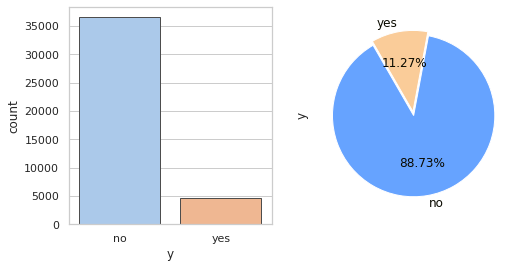

In [12]:
#show target (no, yes) population
fig, ax =plt.subplots(nrows=1,ncols=2, figsize=(8,4))
labels=['no','yes']
sns.countplot(x=df.y, data=df, palette="pastel",ax=ax[0], edgecolor=".3")
df.y.value_counts().plot.pie(autopct="%1.2f%%", ax=ax[1], 
                             colors=['#66a3ff','#facc99'], 
                             labels=labels, explode = (0, 0.05), startangle=120,
                             textprops={'fontsize': 12, 'color':'#0a0a00'})
plt.show()

The target is not balanced. The target with no is about 8 times more than the target with yes. It is necessary to balance the data during modeling.


In [101]:
#check how the features are separated by the target 
df.groupby(['y']).agg(['mean', 'std', 'min', 'max']).T

y                        no     yes
age            mean   39.91   40.91
               std     9.90   13.84
               min    17.00   17.00
               max    95.00   98.00
duration       mean  220.84  553.19
               std   207.10  401.17
               min     0.00   37.00
               max  4918.00 4199.00
campaign       mean    2.63    2.05
               std     2.87    1.67
               min     1.00    1.00
               max    56.00   23.00
pdays          mean  984.11  792.04
               std   120.66  403.41
               min     0.00    0.00
               max   999.00  999.00
previous       mean    0.13    0.49
               std     0.41    0.86
               min     0.00    0.00
               max     7.00    6.00
emp.var.rate   mean    0.25   -1.23
               std     1.48    1.62
               min    -3.40   -3.40
               max     1.40    1.40
cons.price.idx mean   93.60   93.35
               std     0.56    0.68
               min    92.20   92.20
               max    94.77   94.77
cons.conf.idx  mean  -40.59  -39.79
               std     4.39    6.14
               min   -50.80  -50.80
               max   -26.90  -26.90
euribor3m      mean    3.81    2.12
               std     1.64    1.74
               min     0.63    0.63
               max     5.04    5.04
nr.employed    mean 5176.17 5095.12
               std    64.57   87.57
               min  4963.60 4963.60
               max  5228.10 5228.10

In [13]:
#replace no/yes by 0/1
df['y'].replace(['no', 'yes'], [0, 1], inplace=True)

In [48]:
#split DF into numerical and categorical for better manipulation
df_num=df.select_dtypes(include=['number'])
df_cat=df.select_dtypes(include=['object'])
df_num.shape, df_cat.shape

((41176, 11), (41176, 10))

##<b>3a. Explore the numerical data</b>

**Check the outlies.** Scale them so as to plot all together.

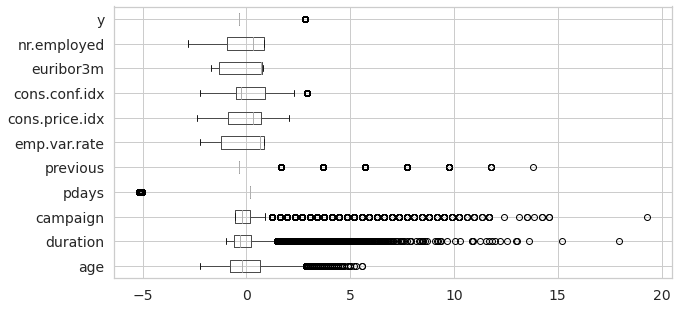

In [49]:
# scale_type='Robust', 'MinMax', 'Standard'
df1=ut.data_scale(df_num, data_type='df', scale_type='Standard')
df1.boxplot(rot=0, fontsize=14, figsize=(10, 5), vert=False )
plt.show()

<b>Check histogram </b> (0 for blue,  1 for brown)

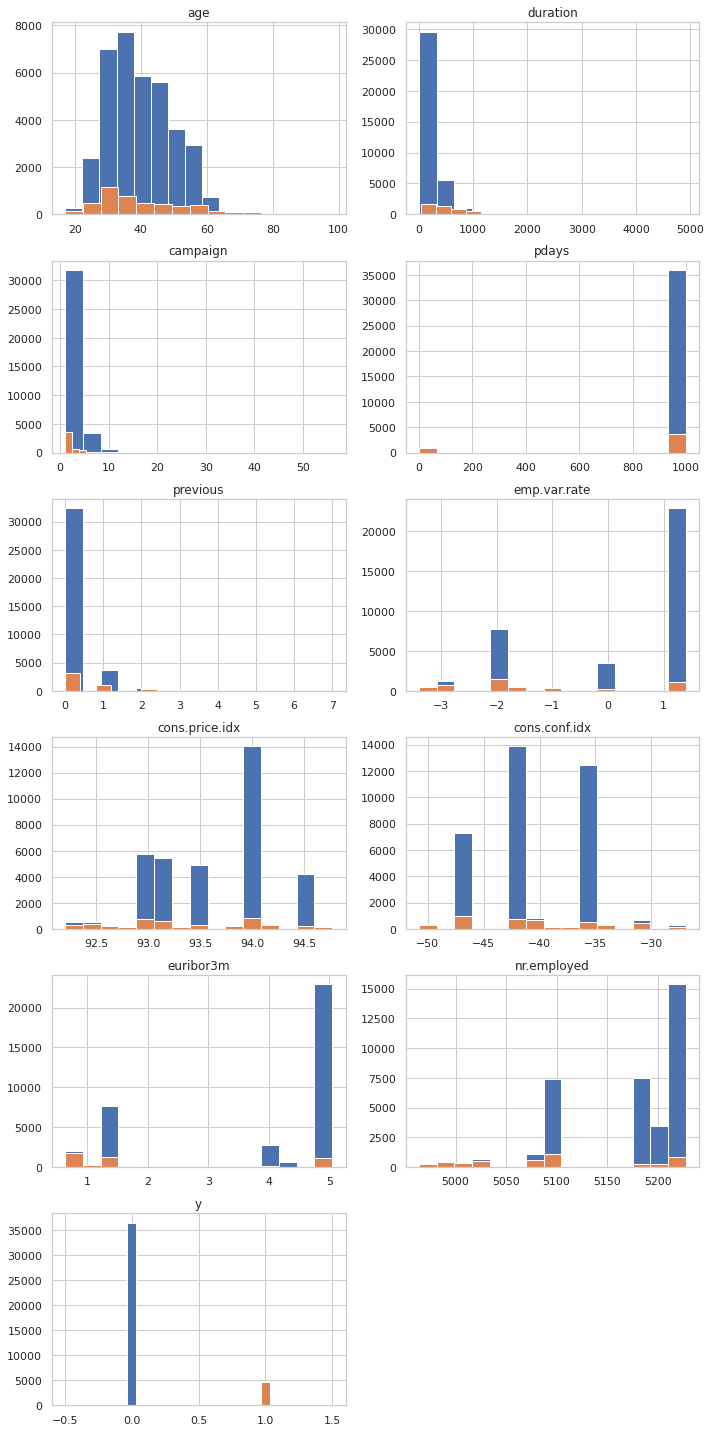

In [50]:
col=list(df_num.columns)
ut.plot_hist_class(df_num, col, nrow=6, ncol=2,  target='y', figsize=(10,20))

<b>Check the density plot </b> to see how well the target is separated for each feature: 

<br>Observations:
1. The 'duration', 'emp.var.rate', 'euribor3m', 'nr.employed'  separated the target well

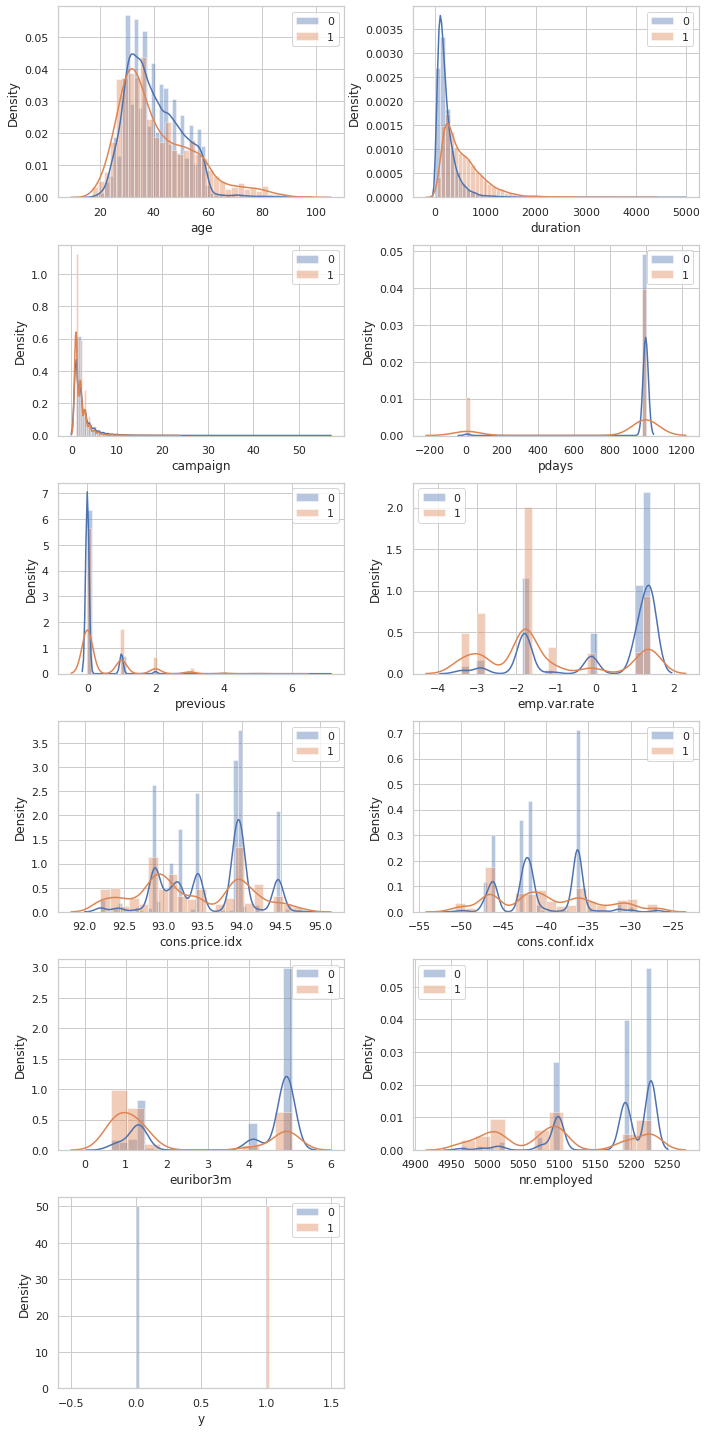

In [51]:
col=list(df_num.columns)
ut.plot_density_class(df_num, col, nrow=6, ncol=2, figsize=(10,20), target='y')


Plot heatmap to show correlations among the numerical features.


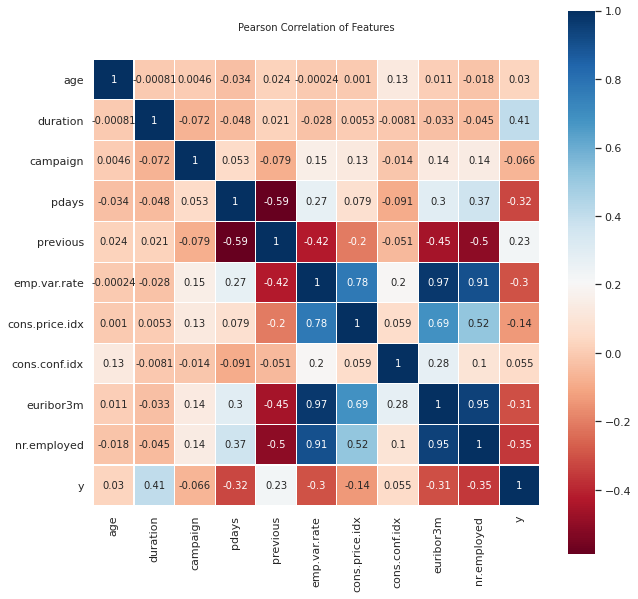

In [52]:
#check correlations
ut.plot_corr(df_num, figsize=(10,10))

In [53]:
#check if exist heavy correlation
#dir(ut)
d=ut.find_corr_columns(df_num, threshold=0.95)


features with correlation > threshold= ['euribor3m']


In [54]:
#remove the heavy correlated feature
df_num.drop(['euribor3m'], axis=1, inplace=True)

<b>Final manipulation of the numerical data:</b>

The feature <font color='red'> duration </font> is removed due to the reason as indicated in the data sets as below: <br>

<i>last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. </i>


In [55]:
df_num.drop(['duration'], axis=1, inplace=True)

##<b>3b. Explore the categorical data</b>

In [20]:
#reduce categorical level for education
df_cat['education'].replace(['basic.4y','basic.6y','basic.9y'], 
                           ['basic','basic','basic'], inplace=True)
df_cat['education'].replace(['unknown','illiterate'], 
                           ['other','other'], inplace=True)

In [21]:
def check_target(df, col='', target=''):
  '''check how the target is distributed in each level
  '''
  d1=df[df[target]==0][col].value_counts().to_frame()
  d2=df[df[target]==1][col].value_counts().to_frame()

#pd.merge(d1, d2, left_index=True, right_index=True)
  dd=pd.concat([d1,d2], axis=1)
  dd.columns=[col+'_no', col+'_yes']
  dd['ratio_yes/no'] = dd[col+'_yes']/dd[col+'_no']

  return dd

<b>Check how categorical data seperated the target</b>. Observations below:
1. for Job: Student and retired people are the highest ratios and blue-collar is the lowest.
2. for contact: There is big difference betwee telephone and cellular.
3. fop month: Mar,Sep, Oct, Dec have the very high rate, although there are many counts.
4. for poutcome: The rate is significantly high when the last campain was success.

In [22]:
df_cat['y']=df_num['y']
for col in list(df_cat.columns):
  print ('\n-------checking feature--------',col)
  print(check_target(df_cat, col=col, target='y'))



-------checking feature-------- job
               job_no  job_yes  ratio_yes/no
admin.           9068     1351          0.15
blue-collar      8615      638          0.07
technician       6009      730          0.12
services         3644      323          0.09
management       2596      328          0.13
entrepreneur     1332      124          0.09
retired          1284      434          0.34
self-employed    1272      149          0.12
housemaid         954      106          0.11
unemployed        870      144          0.17
student           600      275          0.46
unknown           293       37          0.13

-------checking feature-------- marital
          marital_no  marital_yes  ratio_yes/no
married        22390         2531          0.11
single          9944         1620          0.16
divorced        4135          476          0.12
unknown           68           12          0.18

-------checking feature-------- education
                     education_no  education_yes  rati

In [89]:
#add dummy variables (regression need number), drop the first one (duplicated)
df_cat=pd.get_dummies(df_cat, drop_first=True)
print(f'Dimensions after one-hot encode {df_cat.shape}')

Dimensions after one-hot encode (41176, 43)


In [ ]:
#plot histogram for categorical data
#for f in col: ut.plot_hist_class_one(df,  target='y', feature=[f], figsize=(8,4))

In [ ]:
# drop/assign the row if the ratio is too low.
#df_test=ut.assign_other(df_num, col=['age'],val=0.0001, action='drop')

#**4 Binary classification**

The feature <font color='red'> duration </font> is removed throughout all the modeling: <br>



**4a.   Classification using the numerical data only!**


In [74]:
#drop the duration for business reason
df_final=df_num.copy()
X_train, X_test, y_train, y_test = ut.split_data(df_final, size=0.30, 
                                                 target='y', stratify='yes')

shape of X=(41176, 8), X_train=(28823, 8),  X_test=(12353, 8)


In [75]:
#select the best features (RFE is very slow)
#X_train, X_test=ut.feature_selection(X_train, X_test, y_train, y_test, 'RFE', 8)
X_train_s, X_test_s=ut.feature_selection(X_train, X_test, y_train, y_test, 'model_RF', 8)
#X_train_s, X_test_s=ut.feature_selection(X_train, X_test, y_train, y_test, 'model_XGB', 8)


Feature selection:  using ftype= model_RF nfeature= 8
The shape of X_train =  (28823, 8)
The shape of X_train_select =  (28823, 8)
          feature  importance
0             age        0.31
7     nr.employed        0.28
1        campaign        0.13
2           pdays        0.09
6   cons.conf.idx        0.07
5  cons.price.idx        0.05
3        previous        0.04
4    emp.var.rate        0.01


In [76]:
#tuning paramters (Note: the testing is not used for training!)

tune.tune_classifier_all(X_train_s, y_train, X_test_s, y_test,tune=1)
#tune.tune_classifier('RandomForestClassifier', X_train_s, y_train, X_test_s, y_test,tune=1)
#tune.tune_classifier('XGBClassifier', X_train_s, y_train, X_test_s, y_test, tune=1)


------------------------------------------------------------------

Tuning hyperparameters for  RandomForestClassifier
input_params= {'criterion': ['gini', 'entropy'], 'max_depth': [6, 4, 2, None], 'n_estimators': [200], 'max_features': ['auto', None]}

best_train_score=0.900: best_test_score=0.899 : CPU time= 125.03 s
best_params= {'criterion': 'entropy', 'max_depth': 6, 'max_features': None, 'n_estimators': 200}
model= RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=6, max_features=None,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

----------------------------


Confusion_matrix=
 [[10006   955]
 [  599   793]]
Classification_report=
               precision    recall  f1-score   support

           0       0.94      0.91      0.93     10961
           1       0.45      0.57      0.51      1392

    accuracy                           0.87     12353
   macro avg       0.70      0.74      0.72     12353
weighted avg       0.89      0.87      0.88     12353

Classification accuracy= 0.8742005990447664
Classification AUC_ROC=  0.8014468683115791


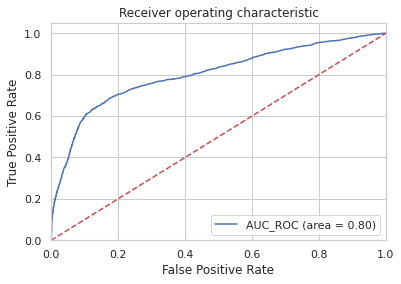

In [84]:
model= XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=4, seed=None,
              silent=None, subsample=1, verbosity=1)
model.fit(X_train_s, y_train)  #fit the model 
y_pred = model.predict(X_test_s)
ut.write_result_class(X_test_s, y_test, y_pred,  model)

<b>Observations from modeling using the numerical data: </b><br>
1. grid search was used to tune the hyperparameters. The best model is ExtraTreesClassifier as below.
<pre>
The table for each model
                      model_inp  train_score  test_score    cpu
0         ExtraTreesClassifier         0.90        0.90  73.22
1           LogisticRegression         0.90        0.90  17.72
2                    LinearSVC         0.90        0.90  17.36
3       DecisionTreeClassifier         0.90        0.90   1.06
4                XGBClassifier         0.90        0.90  37.37
5           AdaBoostClassifier         0.90        0.90  14.54
6       RandomForestClassifier         0.90        0.90 125.03
7         KNeighborsClassifier         0.90        0.90  46.67
8   LinearDiscriminantAnalysis         0.90        0.89   0.56
9   GradientBoostingClassifier         0.91        0.89  64.64
10                 BernoulliNB         0.89        0.89   0.19
11               MLPClassifier         0.89        0.89  13.19
12                  GaussianNB         0.87        0.87   0.21 

</pre>

2. When adjusting class weight to balance the target, XGBClassifier became slightly better. The final stats is from XGB.


<b>4a. Classification using the categorical data only! </b>

In [91]:
#add target y to df_cat
df_final=df_cat.copy()
df_final['y']=df_num['y']
X_train, X_test, y_train, y_test = ut.split_data(df_final, size=0.30, 
                                                 target='y', stratify='yes')

shape of X=(41176, 43), X_train=(28823, 43),  X_test=(12353, 43)


In [103]:
#select the best features (RFE is very slow)
#X_train, X_test=ut.feature_selection(X_train, X_test, y_train, y_test, 'RFE', 20)
X_train_s, X_test_s=ut.feature_selection(X_train, X_test, y_train, y_test, 'model_XGB', 20)


Feature selection:  using ftype= model_XGB nfeature= 20
The shape of X_train =  (28823, 43)
The shape of X_train_select =  (28823, 20)
                        feature  importance
19             poutcome_success        0.27
13                    month_mar        0.12
17                    month_sep        0.08
8             contact_telephone        0.08
16                    month_oct        0.06
12                    month_jun        0.06
7               default_unknown        0.06
10                    month_dec        0.05
2                   job_student        0.04
1                   job_retired        0.03
14                    month_may        0.02
9                     month_aug        0.02
0               job_blue-collar        0.02
15                    month_nov        0.02
18         poutcome_nonexistent        0.02
11                    month_jul        0.01
4            education_basic.9y        0.01
6             education_unknown        0.01
5   education_university.degr

In [104]:
#only use XGB for a fast check!
#tune.tune_classifier_all(X_train_s, y_train, X_test_s, y_test,tune=1)
#tune.tune_classifier('RandomForestClassifier', X_train_s, y_train,X_test_s, y_test,tune=1)
tune.tune_classifier('XGBClassifier', X_train_s, y_train, X_test_s, y_test,tune=1)



------------------------------------------------------------------

Tuning hyperparameters for  XGBClassifier
input_params= {'max_depth': [2, 5, 7, 9], 'subsample': [1], 'n_estimators': [200], 'colsample_bytree': [1]}

best_train_score=0.898: best_test_score=0.897 : CPU time= 66.24 s
best_params= {'colsample_bytree': 1, 'max_depth': 2, 'n_estimators': 200, 'subsample': 1}
model= XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


['XGBClassifier',
 0.8985185442181591,
 0.8967862057799725,
 66.2426369190216,
 {'colsample_bytree': 1, 'max_depth': 2, 'n_estimators': 200, 'subsample': 1},
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0,
               learning_rate=0.1, max_delta_step=0, max_depth=2,
               min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
               nthread=None, objective='binary:logistic', random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
               silent=None, subsample=1, verbosity=1)]


Confusion_matrix=
 [[10298   663]
 [  808   584]]
Classification_report=
               precision    recall  f1-score   support

           0       0.93      0.94      0.93     10961
           1       0.47      0.42      0.44      1392

    accuracy                           0.88     12353
   macro avg       0.70      0.68      0.69     12353
weighted avg       0.88      0.88      0.88     12353

Classification accuracy= 0.8809196146685015
Classification AUC_ROC=  0.7727130057245806


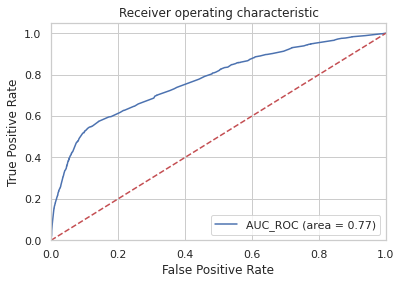

In [106]:
# Create and run the model (fit and predict)

model= XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=4, seed=None,
              silent=None, subsample=1, verbosity=1)

model.fit(X_train_s, y_train)  #fit the model 
y_pred = model.predict(X_test_s)
ut.write_result_class(X_test_s, y_test, y_pred,  model)


<b>Observation from the above modeling:</b> <br>
1. Modeling is worser than using numerical values.

**4c. Classification using all features (categorical + numerical)**

In [107]:
df1=pd.concat([df_num, df_cat], axis=1)
df1.shape

(41176, 52)

In [108]:
df_final=df1.copy()
X_train, X_test, y_train, y_test = ut.split_data(df_final, size=0.30, 
                                                 target='y', stratify='yes')

shape of X=(41176, 51), X_train=(28823, 51),  X_test=(12353, 51)


In [109]:
#select the best features (RFE is very slow)
#X_train, X_test=ut.feature_selection(X_train, X_test, y_train, y_test, 'RFE', 20)
X_train_s, X_test_s=ut.feature_selection(X_train, X_test, y_train, y_test, 'model_XGB', 30)

Feature selection:  using ftype= model_XGB nfeature= 30
The shape of X_train =  (28823, 51)
The shape of X_train_select =  (28823, 30)
                          feature  importance
7                     nr.employed        0.40
29               poutcome_success        0.11
4                    emp.var.rate        0.09
2                           pdays        0.05
6                   cons.conf.idx        0.04
8                 job_blue-collar        0.04
25                      month_oct        0.04
19              contact_telephone        0.03
5                  cons.price.idx        0.02
23                      month_may        0.02
14             education_basic.9y        0.02
26                day_of_week_mon        0.02
17                default_unknown        0.01
3                        previous        0.01
22                      month_mar        0.01
0                             age        0.01
9                     job_retired        0.01
15  education_professional.course    

In [110]:
#only use XGB for a fast check!
#tune.tune_classifier_all(X_train_s, y_train, X_test_s, y_test,tune=1)
tune.tune_classifier('XGBClassifier', X_train_s, y_train, X_test_s, y_test,tune=1)


------------------------------------------------------------------

Tuning hyperparameters for  XGBClassifier
input_params= {'max_depth': [2, 5, 7, 9], 'subsample': [1], 'n_estimators': [200], 'colsample_bytree': [1]}

best_train_score=0.900: best_test_score=0.899 : CPU time= 88.58 s
best_params= {'colsample_bytree': 1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1}
model= XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


['XGBClassifier',
 0.9145821045692676,
 0.8992957176394398,
 88.58130383491516,
 {'colsample_bytree': 1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1},
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0,
               learning_rate=0.1, max_delta_step=0, max_depth=5,
               min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
               nthread=None, objective='binary:logistic', random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
               silent=None, subsample=1, verbosity=1)]


Confusion_matrix=
 [[9892 1069]
 [ 551  841]]
Classification_report=
               precision    recall  f1-score   support

           0       0.95      0.90      0.92     10961
           1       0.44      0.60      0.51      1392

    accuracy                           0.87     12353
   macro avg       0.69      0.75      0.72     12353
weighted avg       0.89      0.87      0.88     12353

Classification accuracy= 0.868857767343965
Classification AUC_ROC=  0.8038408052268912


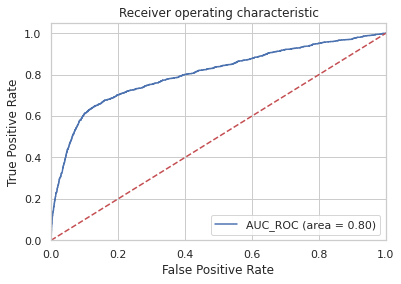

In [117]:
# Create and run the model (fit and predict)

model= XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=5, seed=None,
              silent=None, subsample=1, verbosity=1)

model.fit(X_train_s, y_train)  #fit the model 
y_pred = model.predict(X_test_s)
ut.write_result_class(X_test_s, y_test, y_pred,  model)


Observations: <br>
1. Classification using the full features are better than using either numerical or categorical data.


**4d. Classification based on the synthesized full data set by SMOTE**
<br>
Only the training data is over-sampled so that no data leak will happen.
<br>
Fit the model using the oversampled data, but prediction using the original data!

In [122]:
X_train_sm, y_train_sm=ut.resample_imbalanced_data(X_train_s, y_train, types='SMOTE', 
                                                   ratio=1.0, target='y')

Prog: SMOTE;  # of original X=28823; # of resampled X=51152; perc=1.8e+02%
After Sampling, the shape of X: (51152, 30)
After Sampling, counts of label '1': 25576
After Sampling, counts of label '0': 25576


In [120]:
# Use the selected features 
tune.tune_classifier('XGBClassifier', X_train_sm, y_train_sm, X_test_s, y_test, tune=1)


------------------------------------------------------------------

Tuning hyperparameters for  XGBClassifier
input_params= {'max_depth': [2, 5, 7, 9], 'subsample': [1], 'n_estimators': [200], 'colsample_bytree': [1]}

best_train_score=0.923: best_test_score=0.896 : CPU time= 195.05 s
best_params= {'colsample_bytree': 1, 'max_depth': 9, 'n_estimators': 200, 'subsample': 1}
model= XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


['XGBClassifier',
 0.9616455547276364,
 0.8955719258479722,
 195.0489375591278,
 {'colsample_bytree': 1, 'max_depth': 9, 'n_estimators': 200, 'subsample': 1},
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0,
               learning_rate=0.1, max_delta_step=0, max_depth=9,
               min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
               nthread=None, objective='binary:logistic', random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
               silent=None, subsample=1, verbosity=1)]


Confusion_matrix=
 [[9780 1181]
 [ 565  827]]
Classification_report=
               precision    recall  f1-score   support

           0       0.95      0.89      0.92     10961
           1       0.41      0.59      0.49      1392

    accuracy                           0.86     12353
   macro avg       0.68      0.74      0.70     12353
weighted avg       0.89      0.86      0.87     12353

Classification accuracy= 0.8586578159151623
Classification AUC_ROC=  0.7946210087069411


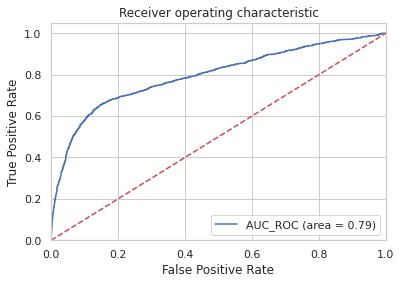

In [130]:
model= XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=4, seed=None,
              silent=None, subsample=1, verbosity=1)


model.fit(X_train_sm, y_train_sm)  #fit the model to sampled data

y_pred = model.predict(X_test_s)  #predict against the original data
ut.write_result_class(X_test_s, y_test, y_pred,  model)



In [132]:
# Do cross validation 
from sklearn import model_selection

print ('Perform 5 folder cross validation for the training data.')
kfold = model_selection.KFold(n_splits=5, random_state=7)
cv_results = model_selection.cross_val_score(model,X_train, y_train, cv=kfold, scoring='accuracy')
msg = "\n%s: \n\naccuracy=%f (std=%f)" % (model, cv_results.mean(), cv_results.std())
print(msg)


Perform 5 folder cross validation for the training data.

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=4, seed=None,
              silent=None, subsample=1, verbosity=1): 

accuracy=0.873296 (std=0.004500)


**3e. Classification by Convolutional Neuro network CNN (use CONV1D)**

In [162]:
#standarize the training and testing data (Robust, MinMax, Standard)
#NN needs numpy data type.(data_type='np' or 'df')
X_train_nn, X_test_nn=ut.data_scalor(X_train_s, X_test_s, data_type='np',scale_type='MinMax')
X_train_nn.shape, X_test_nn.shape, type(X_train_nn),type(X_test_nn)

((28823, 30), (12353, 30), numpy.ndarray, numpy.ndarray)

In [202]:
#-----------next try a different approch of NN Conv1D--------------------
#Note: neuron network accept 3 D data (convert np first)

xnn_train=np.array(X_train_nn).reshape(X_train_nn.shape[0],X_train_nn.shape[1],1)
xnn_test=np.array(X_test_nn).reshape(X_test_nn.shape[0],X_test_nn.shape[1],1)
xnn_train.shape, xnn_test.shape , X_train_nn.shape

((28823, 30, 1), (12353, 30, 1), (28823, 30))

In [224]:
#build model !

#creat the architecture
model=Sequential()

#convolution layer
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(xnn_test.shape[1],1)))
model.add(BatchNormalization())
#model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))  #drop 20% neurons randomly

#the second layer
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
#model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))  #drop 20% neurons randomly

#Flatten layer
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5)) #prevent overfitting

#Note: here the activation makes a huge difference
#model.add(Dense(1, activation='softmax'))
model.add(Dense(1, activation='sigmoid'))



In [213]:
#print(model.summary())

In [225]:
#model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.00005), metrics=['accuracy'])
history=model.fit(xnn_train, y_train, epochs=10, validation_split=0.30, verbose=1)

Epoch 1/10
631/631 [==============================] - 10s 13ms/step - loss: 0.5419 - accuracy: 0.8181 - val_loss: 0.2926 - val_accuracy: 0.8933
Epoch 2/10
631/631 [==============================] - 9s 14ms/step - loss: 0.3980 - accuracy: 0.8748 - val_loss: 0.3045 - val_accuracy: 0.8945
Epoch 3/10
631/631 [==============================] - 8s 13ms/step - loss: 0.3675 - accuracy: 0.8800 - val_loss: 0.3415 - val_accuracy: 0.8955
Epoch 4/10
631/631 [==============================] - 8s 13ms/step - loss: 0.3333 - accuracy: 0.8913 - val_loss: 0.3509 - val_accuracy: 0.8966
Epoch 5/10
631/631 [==============================] - 8s 13ms/step - loss: 0.3357 - accuracy: 0.8875 - val_loss: 0.3502 - val_accuracy: 0.8971
Epoch 6/10
631/631 [==============================] - 8s 13ms/step - loss: 0.3289 - accuracy: 0.8921 - val_loss: 0.3470 - val_accuracy: 0.8966
Epoch 7/10
631/631 [==============================] - 9s 14ms/step - loss: 0.3104 - accuracy: 0.8978 - val_loss: 0.3484 - val_accuracy: 0.896

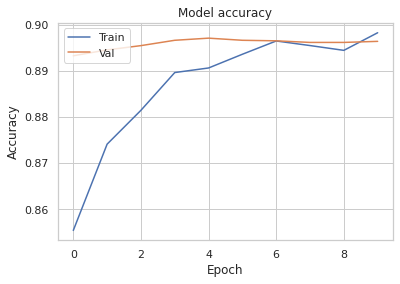

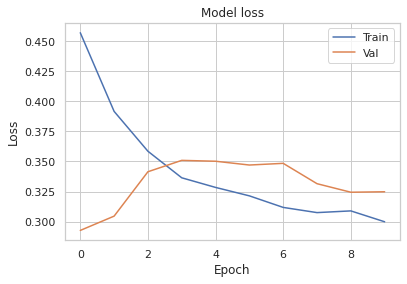

In [226]:
#look at the history
#print(history.history)
ut.plot_deep_learning_curve(history)


Confusion_matrix=
 [[10855   106]
 [ 1158   234]]
Classification_report=
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     10961
           1       0.69      0.17      0.27      1392

    accuracy                           0.90     12353
   macro avg       0.80      0.58      0.61     12353
weighted avg       0.88      0.90      0.87     12353

387/387 [==============================] - 1s 3ms/step - loss: 0.3197 - accuracy: 0.8977
Loss & accuracy= [0.3197123408317566, 0.8976767063140869]
Classification AUC_ROC=  0.7928512479459567


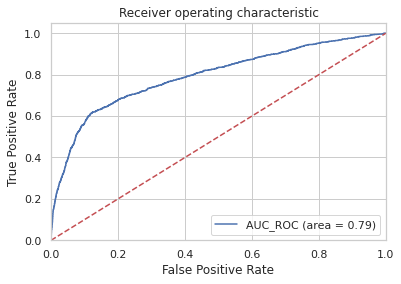

In [227]:
ut.write_cnn_result(x_test, y_test, model)

<b>4f. LogisticRegression based on the synthesized full data set</b> <br>
Note: <br>
1. use as much as possible data for training.
2. The coefficients of LogisticRegression gives the probability of the predictor. If coeff < 0, the probability decrease when this predictor increases a unit, when other are fixed. If coeff > 0, the probability increase amount when this predictor increases a unit, when other are fixed. 


In [292]:
pd.set_option('display.float_format', '{:.3f}'.format)
df_final=df1.copy()
X_train, X_test, y_train, y_test = ut.split_data(df_final, size=0.01, 
                                                 target='y', stratify='no')

shape of X=(41176, 51), X_train=(40764, 51),  X_test=(412, 51)


In [290]:
X_train_s, X_test_s=ut.feature_selection(X_train, X_test, y_train, y_test, 'model_XGB', 40)

Feature selection:  using ftype= model_XGB nfeature= 40
The shape of X_train =  (37058, 51)
The shape of X_train_select =  (37058, 40)
                          feature  importance
7                     nr.employed       0.343
39               poutcome_success       0.130
4                    emp.var.rate       0.103
2                           pdays       0.056
33                      month_oct       0.036
6                   cons.conf.idx       0.035
31                      month_may       0.027
26              contact_telephone       0.025
5                  cons.price.idx       0.022
22                default_unknown       0.019
35                day_of_week_mon       0.015
30                      month_mar       0.015
3                        previous       0.014
10                    job_retired       0.014
8                 job_blue-collar       0.012
15                    job_unknown       0.010
1                        campaign       0.009
0                             age    

In [291]:
xx=X_train_s.reset_index(drop=True)
yy=y_train.reset_index(drop=True)
xx=sm.add_constant(xx) #add a constant for Logit

logit_model=sm.Logit(yy,xx)
#result=logit_model.fit(method='bfgs', maxiter=1000)
result=logit_model.fit_regularized(penalty='l2', class_weight='balanced')
#result=logit_model.fit_regularized(penalty='l1')
#result=logit_model.fit()
print(result.summary())


Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.27538730576507553
            Iterations: 315
            Function evaluations: 331
            Gradient evaluations: 315
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                37058
Model:                          Logit   Df Residuals:                    37017
Method:                           MLE   Df Model:                           40
Date:                Sat, 05 Jun 2021   Pseudo R-squ.:                  0.2166
Time:                        19:15:28   Log-Likelihood:                -10205.
converged:                       True   LL-Null:                       -13027.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------